## Data Understanding & Preparation (30 pts) 
- Data Semantic: introduce the variables with their meaning and characteristics; 
- Distribution of the variables and statistics: explore (single, pairs of...) variables quantitatively (e.g.,statistics, distributions); 
- Assessing data quality: are present errors, outliers, missing values, semantic inconsistencies, etc? 
- Variable transformations: is it better to use for further modules transformed variables (e.g.,log-			transformated)? 
- Pairwise correlations and eventual elimination of variables: matrix correlation (analyse high correlated variables).

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

# import dataset
df_original_copy = pd.read_csv("dataset (missing + split)/train.csv", skipinitialspace=True)
df = pd.read_csv("dataset (missing + split)/train.csv", skipinitialspace=True) #this will be modified

In [24]:
df

name  duration_ms  \
0                                              Long Road       241760   
1                   Daniâl My Son, Where Did You Vanish?       444000   
2                                     Ondskapens Galakse       333506   
3                                        Can't Look Away       269800   
4                                          Thunderground       307651   
...                                                  ...          ...   
14995                                              Outpt       432026   
14996  Natural Environment Sounds: To Improve Sleep a...       182746   
14997                               Psychological Attack       400091   
14998             Don't Hate The 808 (feat. Lafa Taylor)       197250   
14999                                    Parchaiyon Mein       198409   

       explicit  popularity                         artists  \
0         False          46                   Funki Porcini   
1         False           0                   Siavash Amini   
2         False           3                       Kvelertak   
3         False          23               The Wood Brothers   
4         False          25          The Darkraver;DJ Vince   
...         ...         ...                             ...   
14995     False           0                        Autechre   
14996     False          44  Natural White Noise Relaxation   
14997     False          43                         Droplex   
14998     False          37          Bassnectar;Lafa Taylor   
14999     False          36                   Ashwin Adwani   

                                              album_name  danceability  \
0                                          Hed Phone Sex         0.690   
1                                   A Trail of Laughters         0.069   
2                                             Nattesferd         0.363   
3                                      One Drop of Truth         0.523   
4                                 Happy Hardcore Top 100         0.643   
...                                                  ...           ...   
14995                                                EP7         0.554   
14996  Baby Sleep White Noise: Ultimate Album to Help...         0.103   
14997                               Psychological Attack         0.799   
14998                                    Noise vs Beauty         0.511   
14999                                    Parchaiyon Mein         0.678   

       energy  key  loudness  mode  speechiness  acousticness  \
0       0.513    5   -12.529   1.0       0.0975      0.302000   
1       0.196    1   -24.801   0.0       0.0805      0.283000   
2       0.854    2    -7.445   NaN       0.0397      0.000089   
3       0.585    5    -5.607   1.0       0.0765      0.066400   
4       0.687    7   -11.340   1.0       0.0539      0.000576   
...       ...  ...       ...   ...          ...           ...   
14995   0.657    1   -14.232   NaN       0.0558      0.016000   
14996   0.860    1   -19.627   1.0       0.0595      0.548000   
14997   0.535    1    -9.103   NaN       0.0594      0.001830   
14998   0.970    5    -2.299   1.0       0.0531      0.000337   
14999   0.518    6    -7.790   1.0       0.0352      0.463000   

       instrumentalness  liveness  valence    tempo  features_duration_ms  \
0              0.536000    0.2810   0.6350  142.221                241760   
1              0.934000    0.3600   0.0336   75.596                444000   
2              0.800000    0.2620   0.4890  116.628                333507   
3              0.001270    0.1170   0.3850  140.880                269800   
4              0.096900    0.2990   0.6370  143.956                307652   
...                 ...       ...      ...      ...                   ...   
14995          0.615000    0.1320   0.0335  117.319                432027   
14996          0.940000    0.1230   0.0016   92.323                182747   
14997          0.857000    0.0713   0.0708  126.000    

In [5]:
df.dtypes


name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

### Data attributes distributions and correlations
In the following lines, the pdfs of the attributes and the correlation matrix will be analyzed. Task is data understanding for data preparation to clustering. 

In [25]:
pd.set_option("display.max_columns", 30) #In order to display all columns
display(df)

name  duration_ms  \
0                                              Long Road       241760   
1                   Daniâl My Son, Where Did You Vanish?       444000   
2                                     Ondskapens Galakse       333506   
3                                        Can't Look Away       269800   
4                                          Thunderground       307651   
...                                                  ...          ...   
14995                                              Outpt       432026   
14996  Natural Environment Sounds: To Improve Sleep a...       182746   
14997                               Psychological Attack       400091   
14998             Don't Hate The 808 (feat. Lafa Taylor)       197250   
14999                                    Parchaiyon Mein       198409   

       explicit  popularity                         artists  \
0         False          46                   Funki Porcini   
1         False           0                   Siavash Amini   
2         False           3                       Kvelertak   
3         False          23               The Wood Brothers   
4         False          25          The Darkraver;DJ Vince   
...         ...         ...                             ...   
14995     False           0                        Autechre   
14996     False          44  Natural White Noise Relaxation   
14997     False          43                         Droplex   
14998     False          37          Bassnectar;Lafa Taylor   
14999     False          36                   Ashwin Adwani   

                                              album_name  danceability  \
0                                          Hed Phone Sex         0.690   
1                                   A Trail of Laughters         0.069   
2                                             Nattesferd         0.363   
3                                      One Drop of Truth         0.523   
4                                 Happy Hardcore Top 100         0.643   
...                                                  ...           ...   
14995                                                EP7         0.554   
14996  Baby Sleep White Noise: Ultimate Album to Help...         0.103   
14997                               Psychological Attack         0.799   
14998                                    Noise vs Beauty         0.511   
14999                                    Parchaiyon Mein         0.678   

       energy  key  loudness  mode  speechiness  acousticness  \
0       0.513    5   -12.529   1.0       0.0975      0.302000   
1       0.196    1   -24.801   0.0       0.0805      0.283000   
2       0.854    2    -7.445   NaN       0.0397      0.000089   
3       0.585    5    -5.607   1.0       0.0765      0.066400   
4       0.687    7   -11.340   1.0       0.0539      0.000576   
...       ...  ...       ...   ...          ...           ...   
14995   0.657    1   -14.232   NaN       0.0558      0.016000   
14996   0.860    1   -19.627   1.0       0.0595      0.548000   
14997   0.535    1    -9.103   NaN       0.0594      0.001830   
14998   0.970    5    -2.299   1.0       0.0531      0.000337   
14999   0.518    6    -7.790   1.0       0.0352      0.463000   

       instrumentalness  liveness  valence    tempo  features_duration_ms  \
0              0.536000    0.2810   0.6350  142.221                241760   
1              0.934000    0.3600   0.0336   75.596                444000   
2              0.800000    0.2620   0.4890  116.628                333507   
3              0.001270    0.1170   0.3850  140.880                269800   
4              0.096900    0.2990   0.6370  143.956                307652   
...                 ...       ...      ...      ...                   ...   
14995          0.615000    0.1320   0.0335  117.319                432027   
14996          0.940000    0.1230   0.0016   92.323                182747   
14997          0.857000    0.0713   0.0708  126.000    

In [34]:
#Changing udm to duration_ms and features_duration_ms from ms to min
df['duration_ms'] *= 1/6e4
df['features_duration_ms'] *= 1/6e4
display(df)

name  duration_ms  \
0                                              Long Road     4.029333   
1                   Daniâl My Son, Where Did You Vanish?     7.400000   
2                                     Ondskapens Galakse     5.558433   
3                                        Can't Look Away     4.496667   
4                                          Thunderground     5.127517   
...                                                  ...          ...   
14995                                              Outpt     7.200433   
14996  Natural Environment Sounds: To Improve Sleep a...     3.045767   
14997                               Psychological Attack     6.668183   
14998             Don't Hate The 808 (feat. Lafa Taylor)     3.287500   
14999                                    Parchaiyon Mein     3.306817   

       explicit  popularity                         artists  \
0         False          46                   Funki Porcini   
1         False           0                   Siavash Amini   
2         False           3                       Kvelertak   
3         False          23               The Wood Brothers   
4         False          25          The Darkraver;DJ Vince   
...         ...         ...                             ...   
14995     False           0                        Autechre   
14996     False          44  Natural White Noise Relaxation   
14997     False          43                         Droplex   
14998     False          37          Bassnectar;Lafa Taylor   
14999     False          36                   Ashwin Adwani   

                                              album_name  danceability  \
0                                          Hed Phone Sex         0.690   
1                                   A Trail of Laughters         0.069   
2                                             Nattesferd         0.363   
3                                      One Drop of Truth         0.523   
4                                 Happy Hardcore Top 100         0.643   
...                                                  ...           ...   
14995                                                EP7         0.554   
14996  Baby Sleep White Noise: Ultimate Album to Help...         0.103   
14997                               Psychological Attack         0.799   
14998                                    Noise vs Beauty         0.511   
14999                                    Parchaiyon Mein         0.678   

       energy  key  loudness  mode  speechiness  acousticness  \
0       0.513    5   -12.529   1.0       0.0975      0.302000   
1       0.196    1   -24.801   0.0       0.0805      0.283000   
2       0.854    2    -7.445   NaN       0.0397      0.000089   
3       0.585    5    -5.607   1.0       0.0765      0.066400   
4       0.687    7   -11.340   1.0       0.0539      0.000576   
...       ...  ...       ...   ...          ...           ...   
14995   0.657    1   -14.232   NaN       0.0558      0.016000   
14996   0.860    1   -19.627   1.0       0.0595      0.548000   
14997   0.535    1    -9.103   NaN       0.0594      0.001830   
14998   0.970    5    -2.299   1.0       0.0531      0.000337   
14999   0.518    6    -7.790   1.0       0.0352      0.463000   

       instrumentalness  liveness  valence    tempo  features_duration_ms  \
0              0.536000    0.2810   0.6350  142.221              4.029333   
1              0.934000    0.3600   0.0336   75.596              7.400000   
2              0.800000    0.2620   0.4890  116.628              5.558450   
3              0.001270    0.1170   0.3850  140.880              4.496667   
4              0.096900    0.2990   0.6370  143.956              5.127533   
...                 ...       ...      ...      ...                   ...   
14995          0.615000    0.1320   0.0335  117.319              7.200450   
14996          0.940000    0.1230   0.0016   92.323              3.045783   
14997          0.857000    0.0713   0.0708  126.000    

In [27]:
df.isnull().any()

name                     False
duration_ms              False
explicit                 False
popularity               False
artists                  False
album_name               False
danceability             False
energy                   False
key                      False
loudness                 False
mode                      True
speechiness              False
acousticness             False
instrumentalness         False
liveness                 False
valence                  False
tempo                    False
features_duration_ms     False
time_signature            True
n_beats                  False
n_bars                   False
popularity_confidence     True
processing               False
genre                    False
dtype: bool

### Characteristics of some attributes to be undestood
- **Speechiness**: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech;
- **Energy** “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
- **Liveness**: this value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”;
- **Valence**: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

In [28]:
df['time_signature'].value_counts()

time_signature
4.0    11160
3.0     1162
5.0      375
1.0      149
0.0       92
Name: count, dtype: int64

In [31]:
df[(df['time_signature'] == 0.0)]

name  duration_ms  \
267          Hair Dryer Sound 20 - Loopable With No Fade     1.400000   
664    Brown Noise with Binaural Beats - Theta - Loop...     1.231433   
727                                   Outside Air Unit 2     1.068367   
865                          Weißes Rauschen: Rem-Schlaf     1.547983   
944                                      Continuous Rain     2.708250   
1153                             Ich muss jetzt schlafen     2.991683   
1211                                                 V-4     0.223100   
1259                                         Spray Paint     1.288600   
1328                  Loopable Pink Noise Flowing Waters     3.600000   
1501                     Plastic Hair Dryer - Stationary     1.283950   
1550                             White Noise - BP 228 hz     2.645150   
2009                                      Calming Hoover     2.666667   
2105            Pure White Noise - Loopable with No Fade     1.231433   
2644          Baby White Noise Series - Pure White Noise     5.000000   
2686                Pouring Rain - Loopable with No Fade     1.557517   
2749                                    Static Rainstorm     1.650500   
3080       Deeper Sounding Vacuum Cleaner 2 - Stationary     1.312317   
3244                                       Relaxing Rain     1.260817   
3481                                      Aire de verano     2.133333   
3490                              The Early Morning Rain     1.464550   
3682                                       Paradise Rain     4.474517   
3848                    Yes! No! I Mean Yes! No I Don't!     0.638883   
3873                             Brown Noise For Sleep 3     1.281233   
4222                             Rain: Natural Recording     1.403650   
4545              Ocean Sounds: Relaxing Wind - Loopable     2.148600   
4607                         Weißes Rauschen: Tiefschlaf     1.572750   
4793                          Rain Sounds for Deep Sleep     2.791667   
4850                                   Clean White Noise     1.210850   
5093              Brown Noise Waves and the Pouring Rain     1.557517   
5222                                     Tin White Noise     3.034167   
5226                         Box Fan Long Loop For Sleep     8.336100   
5391                              White Noise for Babies     4.266667   
5392                             Neugeborene Schlafhilfe     3.332150   
5494               Leaving Her Quantum Journey Behind...     0.836433   
5603        Weißes Rauschen: Hintergrund Lärm Für Schlaf     1.738200   
5795            Pure Brown Noise - Loopable with No Fade     1.189950   
5821                             White Noise - BP 940 hz     2.645150   
5892           Clean White Noise - Loopable with no fade     1.503800   
6175                              Pink Noise For Sleep 9     1.271017   
6223                         Natur eigene Schlafmaschine     3.468417   
6308                                       Vacum Cleaner     5.000000   
6435                        Rain Sleep: Deep Forest Rain     1.514567   
6502                                     Sleeping Hoover     4.266667   
6791                                       Sleepy Hoover     2.133333   
7260                             Brown Noise For Sleep 2     1.363800   
7502                                    Pure White Noise     5.000000   
7625             Air Conditioner - Loopable With No Fade     1.291367   
7669                                          Hair Salon     1.245000   
7805                                   Calm Hoover Noise     2.133333   
7900                             Pink Noise for Sleeping     4.000000   
7912                          Rain Sound : Loopable Rain     2.600000   
8065             Here Comes the Sun (Piano Instrumental)     3.395083   
8236               Pouring Rain and Soothing Brown Noise     1.557517   
8410                                    Hidden Waterfall     7.049567   
8429                                 

In [32]:
df['key'].value_counts()

key
7     1800
0     1741
1     1568
2     1481
9     1431
5     1209
11    1205
6     1089
4     1081
10    1063
8      905
3      427
Name: count, dtype: int64

In [35]:
#Verifying if features_duration_ms is really redundant
array = np.array([df['duration_ms']-df['features_duration_ms']])
print(array)

[[ 0.00000000e+00  0.00000000e+00 -1.66666667e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [37]:
print(f'The number of nonzero values of this array is:{np.count_nonzero(array)}')

The number of nonzero values of this array is:5832


In [43]:
arr_masked=array[array>(1e-5)]
print(arr_masked)
print(f'Counts of nonzero values greater than 1e-5: {len(arr_masked)}')

[1.56666667e-03 2.56120000e+00 2.36666667e-03 1.66166667e-02
 1.22066667e-01 2.79166667e-02 2.73333333e-03 7.33333333e-04
 7.83333333e-03 7.76533333e-01 7.00000000e-04 3.08500000e-02
 7.16666667e-04 1.76666667e-03 5.61666667e-03 1.08000000e-02
 5.51666667e-03 5.45000000e-03 1.36313333e+00 7.00000000e-03
 2.96666667e-03 3.66666667e-04 7.25000000e-03 1.14333333e-02
 3.27333333e-02 3.70000000e-03 2.52166667e-02 3.33333333e-04
 2.25000000e-02 5.13333333e-03 3.68333333e-03 1.41666667e-03
 9.33333333e-03 2.38333333e-03 4.61666667e-03 2.46833333e-02
 8.55000000e-03 1.03166667e-02 2.68333333e-03 6.58333333e-03]
Counts of nonzero values greater than 1e-5: 40


The attibute `features_duration_ms` is redundant, the maximum difference between this array and `duration_ms` is in the order of 1/10 of second. Because of this, one of this column will be deleted for data optimization.

In [40]:
del df['features_duration_ms']
df.dtypes

name                      object
duration_ms              float64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

### Analysis of attributes pdfs and correlations

In [45]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

- The nullity of `time_signature` is not a missing value, is one of the possible categorical values;
- same for `mode`;
- `popularity_confidence` null values indicates that there is no confidence on popularity values, so for the null values of this attribute, `popularity` values are in some sense null (Ask about this, not really sure).

In [46]:
#Counting NaN values in the datasets
df.isna().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

In [48]:
df['key'].value_counts()

key
7     1800
0     1741
1     1568
2     1481
9     1431
5     1209
11    1205
6     1089
4     1081
10    1063
8      905
3      427
Name: count, dtype: int64

In [49]:
df['mode'].value_counts()


mode
1.0    6661
0.0    3889
Name: count, dtype: int64

In [50]:
df.corr(numeric_only=True) #By default uses Pearson

duration_ms  explicit  popularity  danceability  \
duration_ms               1.000000 -0.048723   -0.076202     -0.080932   
explicit                 -0.048723  1.000000   -0.013096      0.056992   
popularity               -0.076202 -0.013096    1.000000      0.051046   
danceability             -0.080932  0.056992    0.051046      1.000000   
energy                    0.102996  0.124405   -0.056547      0.193940   
key                       0.016712 -0.000991   -0.008992      0.035311   
loudness                  0.039403  0.131777    0.046703      0.385244   
mode                     -0.023310 -0.042846    0.073043     -0.072422   
speechiness              -0.074774  0.294287   -0.096382      0.111454   
acousticness             -0.184902 -0.113975    0.078424     -0.199082   
instrumentalness          0.079685 -0.125101   -0.266843     -0.202316   
liveness                 -0.021184  0.006995    0.027105     -0.174193   
valence                  -0.141938  0.008631    0.077652      0.559578   
tempo                     0.048765  0.016972   -0.024162      0.092267   
time_signature            0.009033  0.051260   -0.003160      0.292167   
n_beats                   0.839313 -0.039830   -0.084774     -0.033604   
n_bars                    0.838041 -0.039435   -0.089134     -0.069332   
popularity_confidence    -0.005830  0.029119   -0.003665      0.011602   
processing               -0.010400 -0.005878    0.008733     -0.026273   

                         energy       key  loudness      mode  speechiness  \
duration_ms            0.102996  0.016712  0.039403 -0.023310    -0.074774   
explicit               0.124405 -0.000991  0.131777 -0.042846     0.294287   
popularity            -0.056547 -0.008992  0.046703  0.073043    -0.096382   
danceability           0.193940  0.035311  0.385244 -0.072422     0.111454   
energy                 1.000000  0.057815  0.720907 -0.079969     0.143454   
key                    0.057815  1.000000  0.047718 -0.157515     0.018157   
loudness               0.720907  0.047718  1.000000 -0.033544     0.109793   
mode                  -0.079969 -0.157515 -0.033544  1.000000    -0.064289   
speechiness            0.143454  0.018157  0.109793 -0.064289     1.000000   
acousticness          -0.699454 -0.049867 -0.552519  0.085246    -0.087997   
instrumentalness      -0.203111 -0.001532 -0.447106 -0.080035    -0.115803   
liveness               0.191024 -0.007420  0.047502  0.015738     0.050034   
valence                0.284069  0.028221  0.377743 -0.006907     0.056068   
tempo                  0.331538  0.022414  0.308203 -0.013001     0.062161   
time_signature         0.204646  0.028388  0.250568 -0.019378     0.080739   
n_beats                0.243586  0.027133  0.165565 -0.030685    -0.043217   
n_bars                 0.208615  0.022042  0.131064 -0.027687    -0.040820   
popularity_confidence  0.040022  0.019790  0.049174  0.003698     0.026399   
processing            -0.037847 -0.490366 -0.020563  0.261129    -0.022909   

                       acousticness  instrumentalness  liveness   valence  \
duration_ms               -0.184902          0.079685 -0.021184 -0.141938   
explicit                  -0.113975         -0.125101  0.006995  0.008631   
popularity                 0.078424         -0.266843  0.027105  0.077652   
danceability              -0.199082         -0.202316 -0.174193  0.559578   
energy                    -0.699454         -0.203111  0.191024  0.284069   
key                       -0.049867         -0.001532 -0.007420  0.028221   
loudness                  -0.552519         -0.447106  0.047502  0.377743   
mode                       0.085246         -0.080035  0.015738 -0.006907   
speechiness               -0.087997         -0.115803  0.050034  0.056068   
acousticness               1.000000          0.094256 -0.075924 -0.131961   
instrumentalness           0.094256          1.000000 -0.088589 -0.348955   
liveness                  -0.075924         -0.088589  1.

In [53]:
sns.pairplot(df,diag_kind='kde')
#kde is the distribution command for diagonal plot
plt.show()

In [55]:
sns.heatmap(df.corr(numeric_only=True,method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

<Axes: >

### What has to be done for making everything more messy? 
- Finding correlated quantities. In particular, being the attributes a lot, if two quantities are strongly correlated, they also must have more or less the same correlation factor with all the others attributes for eliminating the column. The risk is to lose information.  

### The `popularity_confidence` issue
It has been noted that the `popularity_confidence` attribute has less than $\frac{1}{8}$ of not-`NaN` values. 
Before decinding to delete the function, it is of interest of understanding for which `popularity` values the `popularity_confidence` is not `NaN`. 

The number of data objects having non null popularity confidence is: 2217


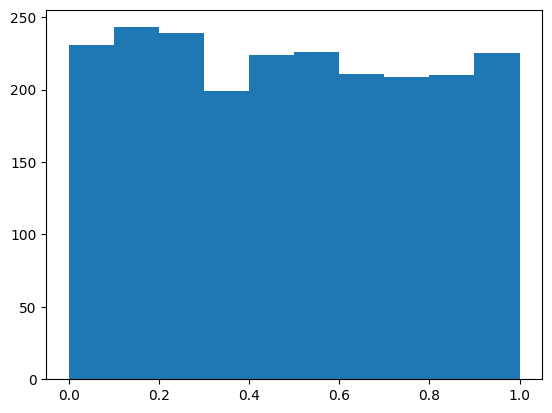

In [17]:
#plotting popularity_confidence vs popularity
df_tmpcopy=df[df['popularity_confidence'].notnull()]
print(f'The number of data objects having non null popularity confidence is: {len(df_tmpcopy)}')
#print(f'pronting the data objects having popularity_confidence different from NaN, they are {len(df_tmpcopy)}: {df_tmpcopy}')
plt.figure(1)
plt.errorbar(df_tmpcopy['popularity'],df_tmpcopy['popularity_confidence'], marker='.',linestyle='',color='firebrick')
plt.figure(2)
plt.hist(df_tmpcopy['popularity_confidence'],bins=10)
plt.show()

Not expected behaviour, not-`NaN` values of `popularity_confidence` spans all space, even if they are not equally distributed. The not-`NaN` values are more dense in the region of low `popularity`, and more sparse in the region of higher popularity. There aren't 'white spaces' anyway. 
### What to do? Think about it.